Matriz de custo:
[[ 0.  1.  2.  0.  3.  2.]
 [inf  0.  1. -1.  2.  1.]
 [inf inf  0.  2.  7.  4.]
 [inf inf inf  0.  5.  2.]
 [inf inf inf -3.  0. -1.]
 [inf inf inf  0.  3.  0.]]


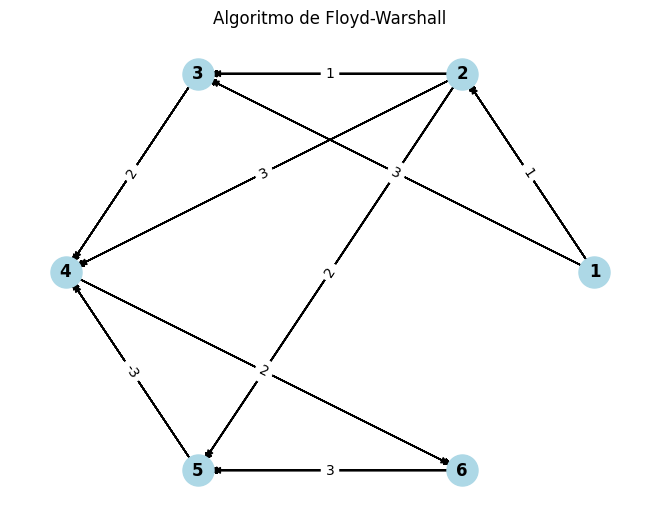

In [11]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Definir o grafo
G = nx.DiGraph()
G.add_edges_from([(1, 2, {'weight': 1}),
                  (1, 3, {'weight': 3}),
                  (2, 3, {'weight': 1}),
                  (2, 4, {'weight': 3}),
                  (2, 5, {'weight': 2}),
                  (3, 4, {'weight': 2}),
                  (4, 6, {'weight': 2}),
                  (5, 4, {'weight': -3}),
                  (6, 5, {'weight': 3})])

# Calcular as distâncias mínimas usando o algoritmo de Floyd-Warshall
dist_matrix = np.array(nx.floyd_warshall_numpy(G, weight='weight'))

# Plotar o grafo original
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=12, font_weight='bold')

# Plotar as arestas dos caminhos mínimos em vermelho
for i in range(len(G.nodes)):
    for j in range(len(G.nodes)):
        if i != j:
            if dist_matrix[i][j] < float('inf'):
                path = nx.shortest_path(G, source=i+1, target=j+1, weight='weight')
                edges = [(path[k], path[k+1]) for k in range(len(path) - 1)]
                nx.draw_networkx_edges(G, pos, edgelist=G.edges(), arrowsize=10)

# Configurar os rótulos das arestas com os pesos
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

# Mostrar a matriz de custo
print("Matriz de custo:")
print(dist_matrix)

# Exibir o gráfico
plt.title("Algoritmo de Floyd-Warshall")
plt.axis('off')
plt.show()